# Diabetes Dataset

## Importing the Dependences

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.impute import KNNImputer

## Data Collection and Processing

In [6]:
# Load datasets
file_path_provided = "Diabetes_Missing_Data.csv"

In [8]:
provided_df = pd.read_csv(file_path_provided)

In [10]:
provided_df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [12]:
type(provided_df)

pandas.core.frame.DataFrame

In [14]:
provided_df.shape

(768, 9)

In [16]:
provided_df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
provided_df.loc[0]

Pregnant               6.000
Glucose              148.000
Diastolic_BP          72.000
Skin_Fold             35.000
Serum_Insulin            NaN
BMI                   33.600
Diabetes_Pedigree      0.627
Age                   50.000
Class                  1.000
Name: 0, dtype: float64

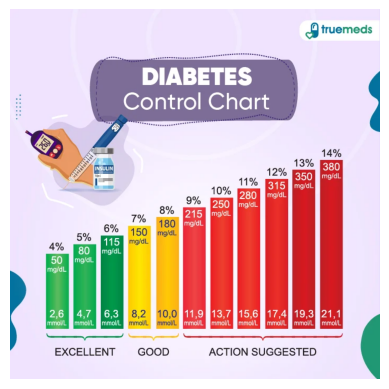

In [20]:
import matplotlib.image as mpimg
# Load and display image
img = mpimg.imread("Blood-Sugar-Levels-Chart-in-Diabetese.jpg")
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

In [22]:
# Initial Dataset Information
print("Initial dataset info:")
provided_df.info()

Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [24]:
provided_df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [26]:
provided_df.tail()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
767,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


### Data Cleaning & Preprocessing

In [29]:
print("\nMissing values before handling:")
print(provided_df.isnull().sum())


Missing values before handling:
Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


### Observation
##### Serum_Insulin has many outliers (above 200 and reaching 800+).
##### Glucose, Diastolic_BP, BMI, and Age appear to have some outliers.
##### Other features like Pregnant, Diabetes_Pedigree, and Class have fewer or no extreme outliers.

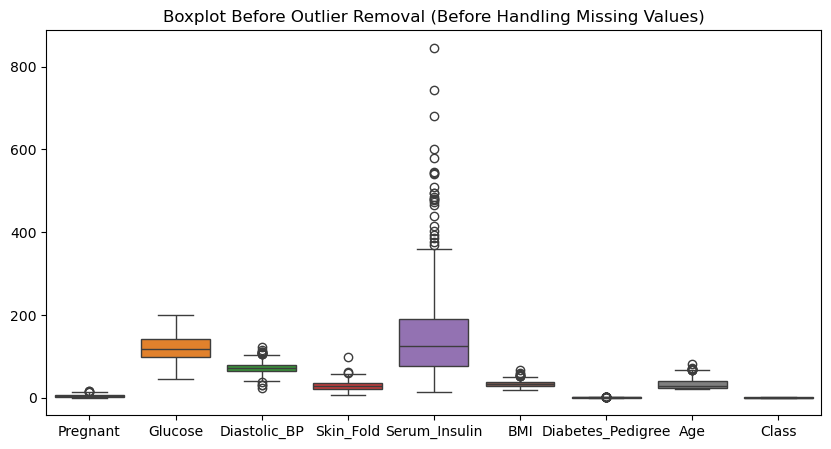

In [32]:
# Visualizing data after removing outliers (before handling missing values)
plt.figure(figsize=(10, 5))
sns.boxplot(data=provided_df)
plt.title("Boxplot Before Outlier Removal (Before Handling Missing Values)")
plt.show()

In [34]:
# Handling Missing Values using KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)
num_cols = provided_df.select_dtypes(include=[np.number]).columns
provided_df[num_cols] = knn_imputer.fit_transform(provided_df[num_cols])

In [36]:
print("\nMissing values after handling:")
print(provided_df.isnull().sum())


Missing values after handling:
Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64


In [38]:
provided_df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.000000,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.000000,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,166.666667,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.333333,120.666667,30.1,0.349,47.0,1.0


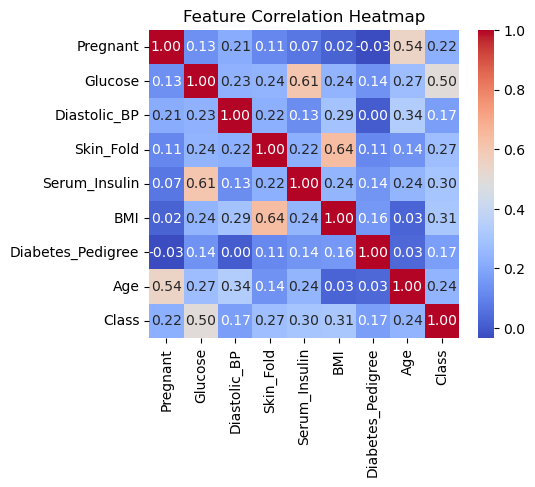

In [40]:
plt.figure(figsize=(5,4))
sns.heatmap(provided_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Added column of BMI Category

In [43]:
# Feature Engineering: BMI Category(Body Mass Index)
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

In [45]:
provided_df['BMI_Category'] = provided_df['BMI'].apply(categorize_bmi)

In [47]:
provided_df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,BMI_Category
0,6.0,148.0,72.0,35.0,125.333333,33.6,0.627,50.0,1.0,Obese
1,1.0,85.0,66.0,29.0,66.666667,26.6,0.351,31.0,0.0,Overweight
2,8.0,183.0,64.0,30.0,195.000000,23.3,0.672,32.0,1.0,Normal
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0,Overweight
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0,Obese


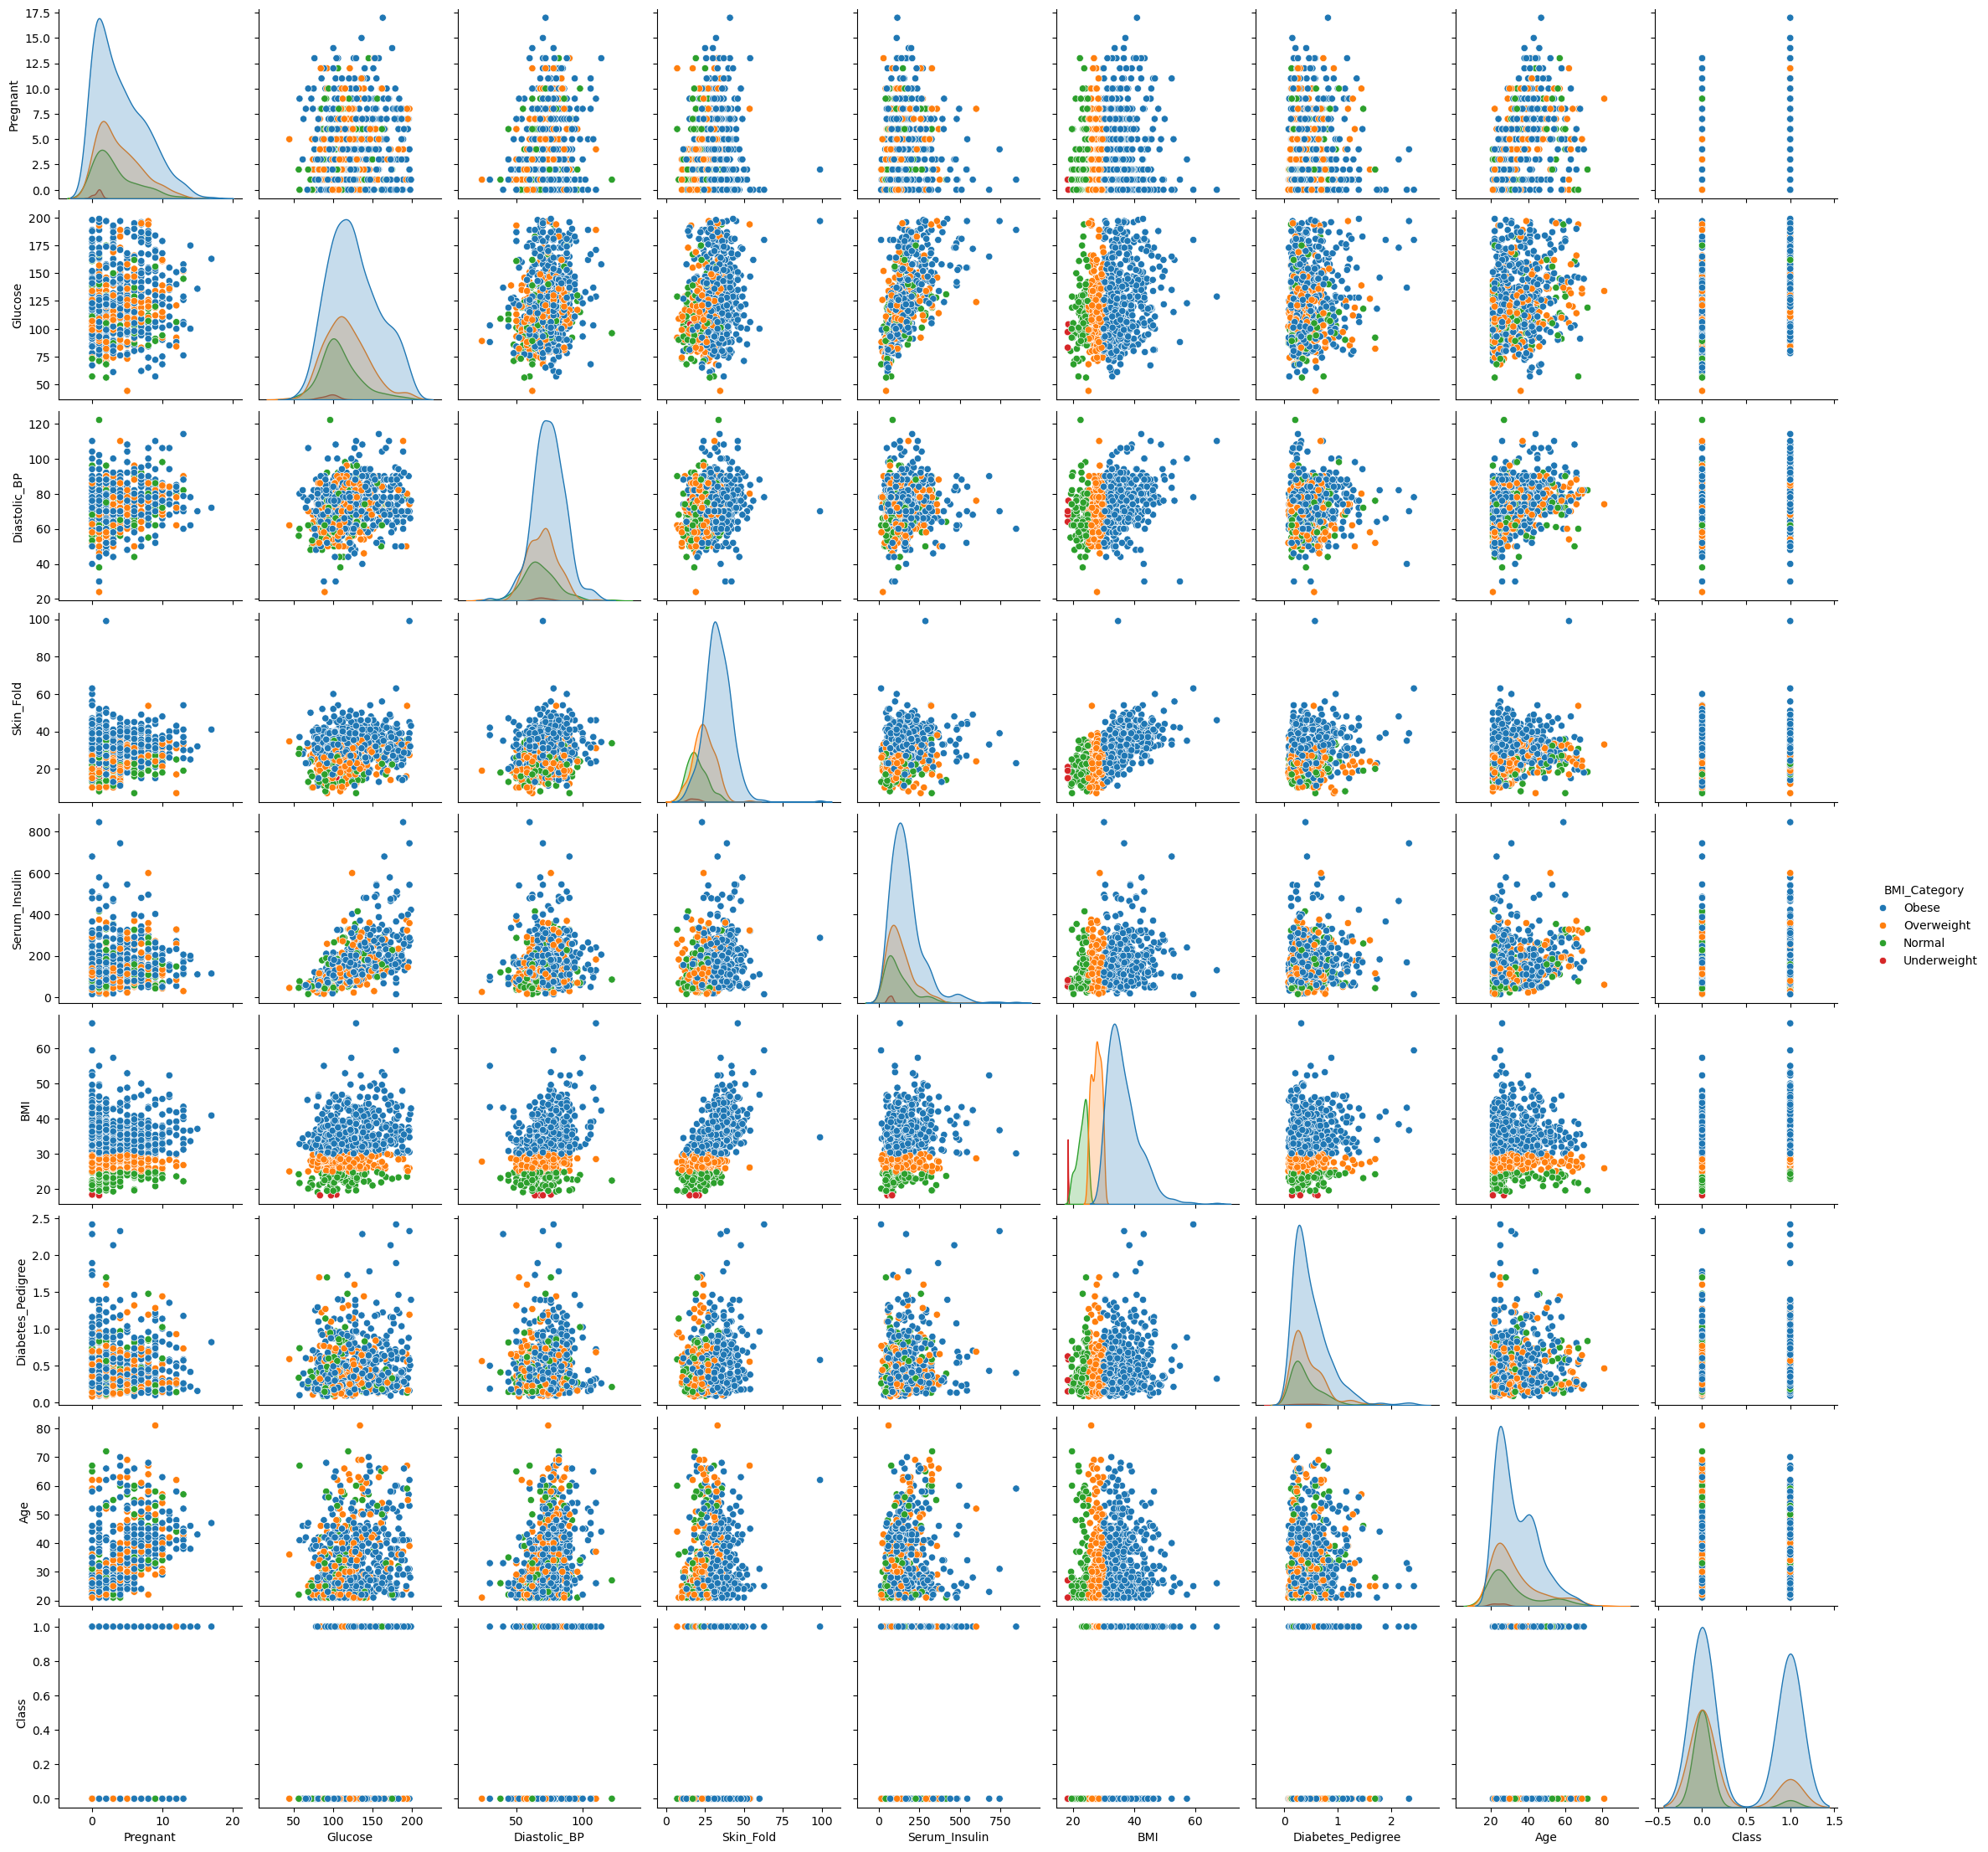

In [49]:
# Pairplot for Multivariate Analysis
sns.pairplot(provided_df, hue="BMI_Category", diag_kind="kde") # Kernel density estimation
plt.show()

In [51]:
# Outlier Removal using IQR
def remove_outliers_iqr(data):
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)  # 25th percentile
        Q3 = data[column].quantile(0.75) # 75th percentile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR 
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [53]:
# Outlier Removal After Missing Value Imputation
provided_df = remove_outliers_iqr(provided_df)

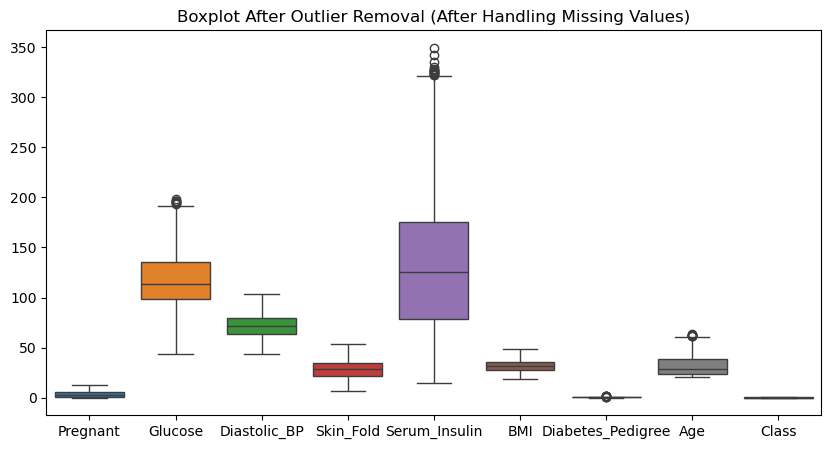

In [55]:
# Visualizing Data After Removing Outliers Again
plt.figure(figsize=(10, 5))
sns.boxplot(data=provided_df)
plt.title("Boxplot After Outlier Removal (After Handling Missing Values)")
plt.show()

### Log Transformation

In [58]:
# Apply log transformation (add 1 to avoid log(0))
provided_df['Serum_Insulin'] = np.log1p(provided_df['Serum_Insulin'])

### Box Plot after log transformation

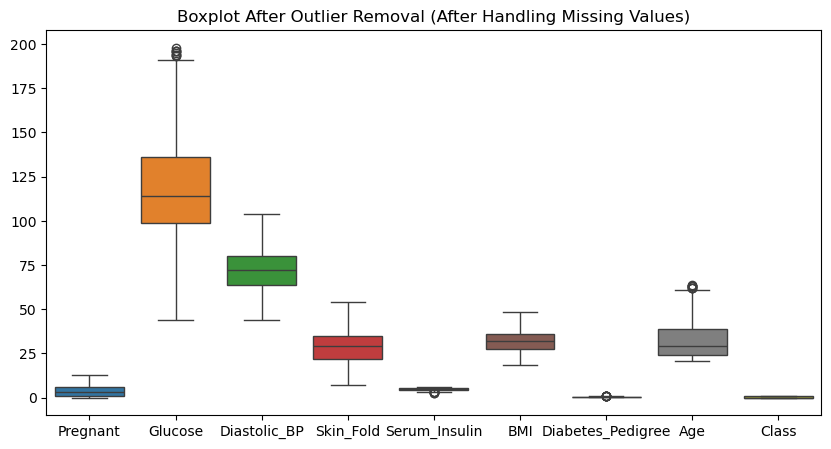

In [61]:
# Visualizing Data After Removing Outliers Again
plt.figure(figsize=(10, 5))
sns.boxplot(data=provided_df)
plt.title("Boxplot After Outlier Removal (After Handling Missing Values)")
plt.show()

### Observation
##### More symmetric, reduced skewness
##### Outliers reduced, more compact distribution
##### Spread reduced, values closer together

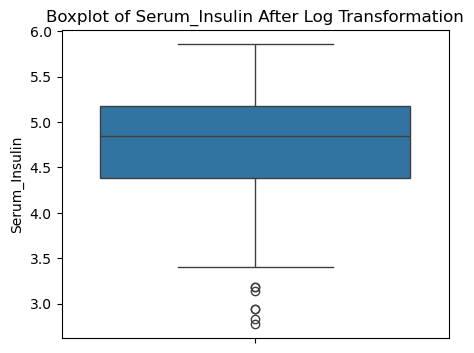

In [64]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=provided_df['Serum_Insulin'])
plt.title("Boxplot of Serum_Insulin After Log Transformation")
plt.show()

### Observation
##### > Both distributions follow a bell-shaped curve, indicating a near-normal distribution.
##### > The "Before" (blue) and "After" (green) curves overlap significantly, meaning missing value handling did not drastically change the overall distribution.
##### > Smooth KDE curves (density estimates) overlay the histogram, helping visualize the overall trend.
##### > The highest peak (mode) appears between 90-120 mg/dL, which is typical for normal glucose levels.

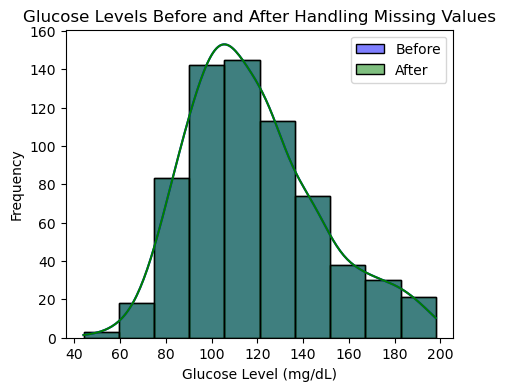

In [67]:
# Visualizing Glucose Level Before and After Handling Missing Values
plt.figure(figsize=(5, 4))
sns.histplot(provided_df['Glucose'].dropna(), bins=10, kde=True, color='blue', label="Before")
sns.histplot(provided_df['Glucose'], bins=10, kde=True, color='green', label="After")
plt.title("Glucose Levels Before and After Handling Missing Values")
plt.xlabel("Glucose Level (mg/dL)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [69]:
# Define Glucose Categories
def categorize_glucose(glucose):
    if glucose <= 80:
        return "Excellent"
    elif glucose <= 115:
        return "Good"
    elif glucose <= 150:
        return "Moderate"
    elif glucose <= 180:
        return "High"
    else:
        return "Action Suggested"

In [71]:
# Apply Categorization
provided_df['Glucose_Category'] = provided_df['Glucose'].apply(categorize_glucose)

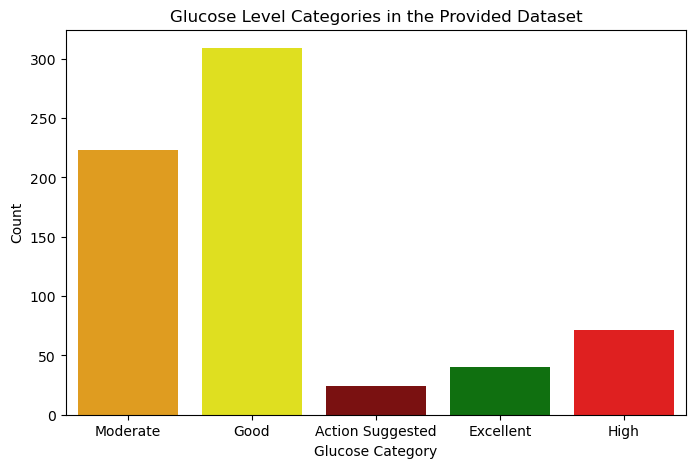

In [73]:
# Visualization of Glucose Categories
plt.figure(figsize=(8, 5))
sns.countplot(data=provided_df, x="Glucose_Category", palette={"Excellent": "green", "Good": "yellow", "Moderate": "orange", "High": "red", "Action Suggested": "darkred"})
plt.title("Glucose Level Categories in the Provided Dataset")
plt.xlabel("Glucose Category")
plt.ylabel("Count")
plt.show()

In [75]:
# Insights and Conclusion
category_counts = provided_df['Glucose_Category'].value_counts()
print("\nGlucose Category Distribution:")
print(category_counts)


Glucose Category Distribution:
Glucose_Category
Good                309
Moderate            223
High                 71
Excellent            40
Action Suggested     24
Name: count, dtype: int64


In [77]:
print("\nKey Insights:")
print("- Majority of individuals have glucose levels categorized as Excellent or Good.")
print("- A moderate number of people fall into Moderate or High levels, indicating potential risk.")
print("- A small percentage falls into the Action Suggested category, indicating possible diabetes risk.")
print("- The comparison shows how real patient data differs from the standard diabetes chart.")


Key Insights:
- Majority of individuals have glucose levels categorized as Excellent or Good.
- A moderate number of people fall into Moderate or High levels, indicating potential risk.
- A small percentage falls into the Action Suggested category, indicating possible diabetes risk.
- The comparison shows how real patient data differs from the standard diabetes chart.


In [79]:
# Assuming 'provided_df' is your cleaned DataFrame
provided_df.to_csv("diabetes_data1.csv", index=False)

In [81]:
df_check = pd.read_csv("diabetes_data1.csv")
df_check.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,BMI_Category,Glucose_Category
0,6.0,148.0,72.0,35.000000,4.838924,33.6,0.627,50.0,1.0,Obese,Moderate
1,1.0,85.0,66.0,29.000000,4.214594,26.6,0.351,31.0,0.0,Overweight,Good
2,8.0,183.0,64.0,30.000000,5.278115,23.3,0.672,32.0,1.0,Normal,Action Suggested
3,1.0,89.0,66.0,23.000000,4.553877,28.1,0.167,21.0,0.0,Overweight,Good
4,5.0,116.0,74.0,18.333333,4.700480,25.6,0.201,30.0,0.0,Overweight,Moderate
